<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/dynprog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamické programování

## Princip optimality

Dynamické programování je motoda operační analýzy, která je určena pro optimalizaci problému, který lze rozdělit do etap. Předpokládejme, že těchto etap je $n$. Potom při řízení můžeme v každé etapě použít řízení $u_i$, čímž ovlivňujeme vývoj stavu řízeného systému. Tento systém nabývá postupně stavů $x_i$. Z matematického hlediska jak řízení $u_i$, tak stavy $x_i$ mohou být vektory.

Cílem je optimalizovat účelovou funkci 

$$J=\sum_{i=0}^{n-1}I_i$$

kde $J$ a $I_i$ jsou např. spotřeba, náklady, apod.

Optimálním řešením je posloupnost vektorů $u=(u_0^*, u_1^*, \dots, u_n^*)$.

R. Bellman formuloval princip optimality: 
> "Optimální strategie hledá optimální pokračování operace vzhledem ke stavu, který nastal v důsledku přijetí předchozího rozhodnutí."

Z tohoto výroku lze odvodit, že rozhodnutí přijaté v každé etapě má vliv na následující etapy. Pouze poslední etapa (řízení $u_{n-1}$) má vliv jen na danou etapu. Víme tedy, že $J_{n-1}=I_{n-1}$.

Pro předposlední etapu (řízení $u_{n-2}$) hledáme

$$J_{n-2}=\max_{u_{n-2}} \{I_{n-2}+J_{n-1} \}$$

Obdobné můžeme vyjádřit pro všechny etapy, včetně etapy první

$$J_{1}=\max_{u_{1}} \{I_{1}+J_{2} \}$$

současně platí, že 

$$J_{1}=J$$

Při použití této metody se v podstatě posloupnost prochází dvakrát. Poprvé od konce k počátku, kdy se hledá podmíněně optimální řízení. Podruhé se prochází od počátku do konce, kdy se furmuluje optimální posloupnost řídící kroků.


## Příklad

### Zadání

Předpokládejme, že letoun se nachází ve výšce $h_A$ a pohybuje se rychlostí $v_A$. Má být dosaženo výšky $h_B \gt h_A$ a rychlosti $v_B \gt v_A$ a to tak, aby spotřeba paliva byla minimální. Spotřeba paliva pro změnu rychlosti, případně pro změnu výšky v daném stavu letounu jsou dány tabulkou.

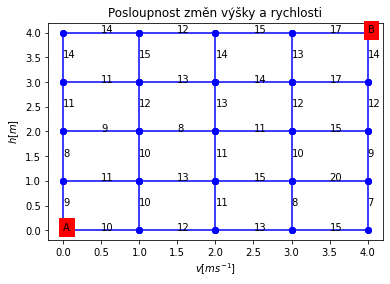

In [1]:
from matplotlib import pyplot as plt

I = {
    0:{0: (10, 9), 1: (12, 10), 2: (13, 11), 3: (15, 8), 4: (None, 7)},
    1:{0: (11, 8), 1: (13, 10), 2: (15, 11), 3: (20, 10), 4: (None, 9)},
    2:{0: (9, 11), 1: (8, 12),  2: (11, 13), 3: (15, 12), 4: (None, 12)},
    3:{0: (11, 14), 1: (13, 15), 2: (14, 14), 3: (17, 13), 4: (None, 14)},
    4:{0: (14, None), 1: (12, None), 2: (15, None), 3: (17, None), 4: (None, None)} 
     }
def plotIt(what):
  for x in range(5):
    for y in range(5):
      labelA, labelB = what[y][x]
      if not labelA is None:
        plt.plot([x, x + 1], [y, y], '-bo')
        plt.text(x + 0.5, y, labelA)
      if not labelB is None:
        plt.plot([x, x], [y, y  + 1], '-bo')
        plt.text(x, y + 0.5, labelB)

  plt.text(0, 0, 'A', backgroundcolor='red')
  plt.text(4, 4, 'B', backgroundcolor='red')
  plt.xlabel('$v [ms^{-1}]$')
  plt.ylabel('$h [m]$');
  plt.title('Posloupnost změn výšky a rychlosti');

plotIt(I)

### Řešení

Celý proces je rozdělen na 8 kroků. Hledáme tedy hodnoty 

$u_0,\dots, u_7$,

$v_0=v_A,\dots, v_7=v_B$,

$h_0=h_A,\dots, h_7=h_B$,

$J_0,\dots, J_7$,

#### Krok 7

Do bodu B se můžeme dostat dvěma způsoby 
- z $[3,4]$ změnou rychlosti, což znamená, že $J_7=17$,
- nebo z $[4,3]$ změnou výšky, což znamená, že $J_7=14$,

#### Krok 6

V kroku 6 řešíme předchůdce stavů $[3,4]$ a $[4,3]$. Do těchto stavů se můžeme dostat ze stavů:
- $[2,4]$ změnou rychlosti do $[3,4]$
- $[3,3]$ změnou rychlosti do $[4,3]$ nebo změnou výšky do $[3,4]$
- $[4,2]$ změnou výšky do $[4,3]$

odpovídající $J_6$ jsou
- $[2,4]$ $J_6=I_6+J_7=15+17=32$
- $[3,3]$ $J_6=\min_{u_6}(I_6+J_7)=\min((13+17),(17+14))=30$
- $[4,2]$ $J_6=I_6+J_7=12+14=26$


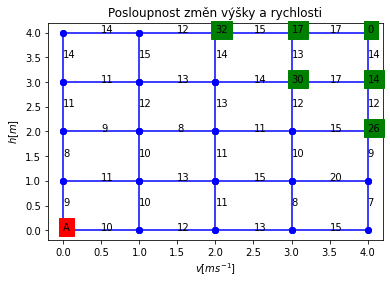

In [2]:
solution = [
  [86, 80, 70, 57, 42], 
  [77, 70, 63, 51, 35],
  [69, 60, 52, 41, 26],
  [68, 57, 44, 30, 14],
  [58, 44, 32, 17, 0]]

def plotSolution(what, stage = 6):
  for x in range(5):
    for y in range(5):
      if (x + y) < stage:
        continue
      value = what[y][x]
      plt.text(x, y, str(value), backgroundcolor='green')

optimalX = [0, 0, 0, 1, 2, 3, 4, 4, 4]
optimalY = [0, 1, 2, 2, 2, 2, 2, 3, 4]

def plotStage(stage=6, showSolution=False):
  plotIt(I)
  plotSolution(solution, stage = stage)
  if showSolution:
    plt.plot(optimalX[:stage+1], optimalY[:stage+1], '-ro')

plotStage(stage=6)

#### Krok 5

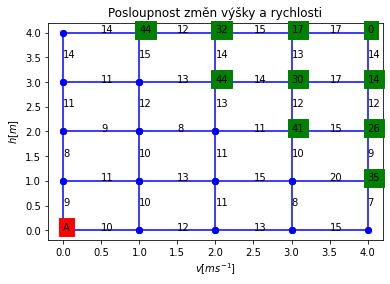

In [3]:
plotStage(5)

#### Krok 4

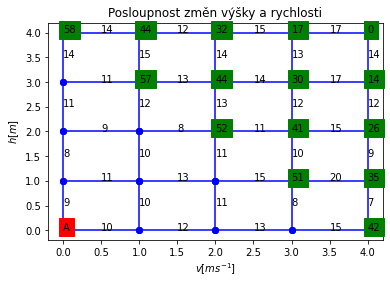

In [4]:
plotStage(4)

#### Krok 3

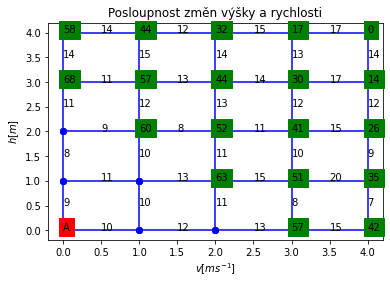

In [5]:
plotStage(3)

#### Krok 2

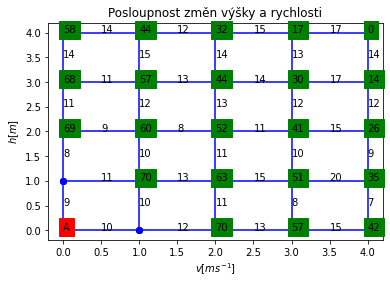

In [6]:
plotStage(2)

#### Krok 1

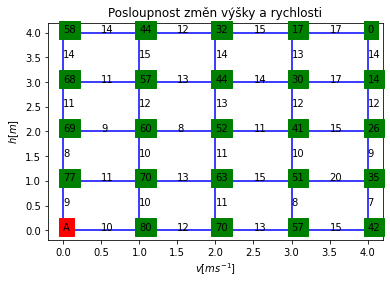

In [7]:
plotStage(1)

#### Krok 0

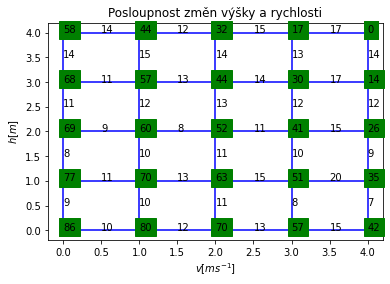

In [8]:
plotStage(0)

#### Krok 0, fáze 2

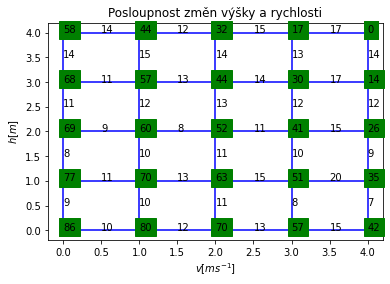

In [9]:
plotStage(0, showSolution=True)

#### Krok 1, fáze 2

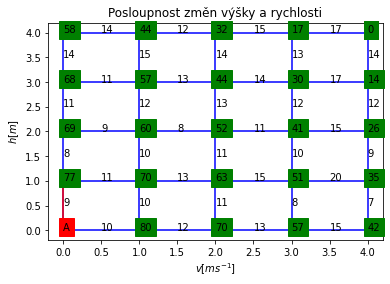

In [10]:
plotStage(1, showSolution=True)

#### Krok 2, fáze 2

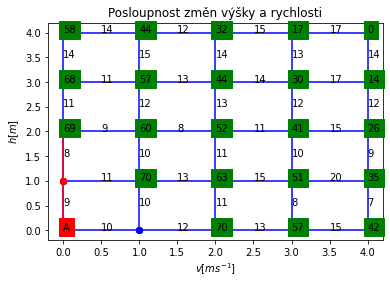

In [11]:
plotStage(2, showSolution=True)

#### Krok 3, fáze 2

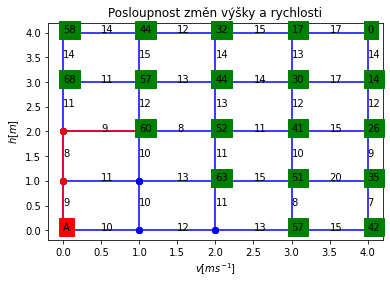

In [12]:
plotStage(3, showSolution=True)

#### Krok 4, fáze 2

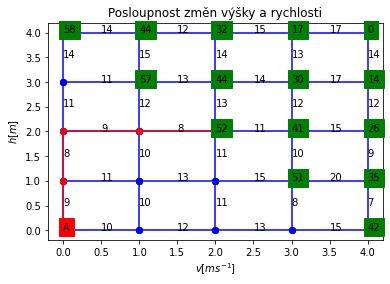

In [13]:
plotStage(4, showSolution=True)

#### Krok 5, fáze 2

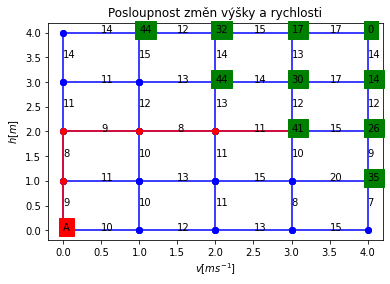

In [14]:
plotStage(5, showSolution=True)

#### Krok 6, fáze 2

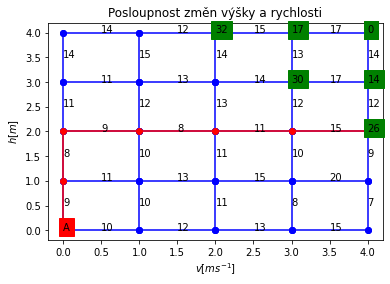

In [15]:
plotStage(6, showSolution=True)

#### Krok 7, fáze 2

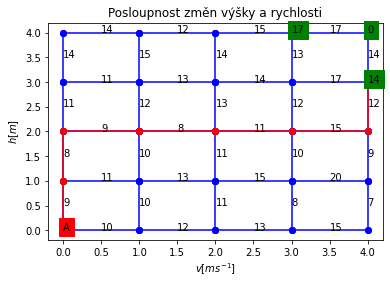

In [16]:
plotStage(7, showSolution=True)

#### Krok 8, fáze 2

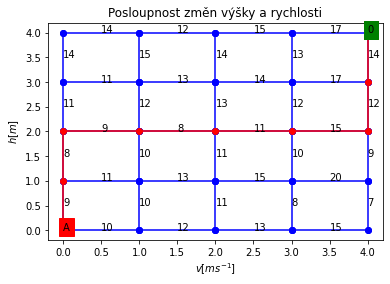

In [17]:
plotStage(8, showSolution=True)

## Doplňující materiál

[Video A](https://www.youtube.com/watch?v=W2ote4jCuYw)

[Video B](https://www.youtube.com/watch?v=_zE5z-KZGRw)

## Příklad k samostatnému řešení

Dopravní úloha – síť dopravních komunikací mezi uzly 1 a 9. Úkolem je minimalizovat náklady na přesun techniky → nalezení nejkratší (minimální) orientované trasy. Vzhledem k různé kvalitě komunikací je vzdálenost mezi místy průjezdu charakterizována různou spotřebou pohonných hmot.

In [61]:
nodes = [
  {'label': '1', 'x': 0, 'y': 0, 'edges': {'2': 50, '3': 115, '4': 65}},
  {'label': '2', 'x': 1, 'y': 1, 'edges': {'6': 50, '5': 70}},
  {'label': '3', 'x': 1, 'y': -0.15, 'edges': {'6': 40, '5': 30}},
  {'label': '4', 'x': 1, 'y': -1, 'edges': {'6': 10, '5': 70}},

  {'label': '5', 'x': 2.25, 'y': 1, 'edges': {'7': 90, '8': 65}},
  {'label': '6', 'x': 2.5, 'y': 0, 'edges': {'7': 75, '8': 15}},

  {'label': '7', 'x': 3.5, 'y': 1, 'edges': {'9': 10}},
  {'label': '8', 'x': 3, 'y': -0.5, 'edges': {'9': 43}},

  {'label': '9', 'x': 4, 'y': 0, 'edges': {}},
] 

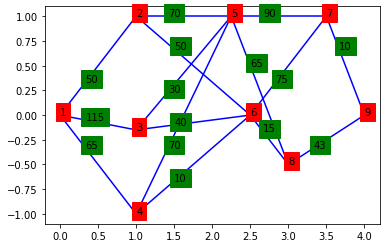

In [62]:
def plotNodes(nodes):
  def getNode(lbl):
    for node in nodes:
      if node['label'] == lbl:
        return node
    
  for node in nodes:
    plt.plot([node['x']], [node['y']], 'ro')
    plt.text(node['x'], node['y'], node['label'], backgroundcolor='red')
  for node in nodes:
    bx = node['x']
    by = node['y']
    for key, value in node['edges'].items():
      enode = getNode(key)
      ex = enode['x'] 
      ey = enode['y']
      plt.plot([bx, ex], [by, ey], '-b')
      plt.text((2*bx+ex)/3, (2*by+ey)/3, str(value), backgroundcolor='green')
      #plt.text((bx+ex)/2, (by+ey)/2, str(value), backgroundcolor='green')
      #plt.text((bx+2*ex)/3, (by+2*ey)/3, str(value), backgroundcolor='green')

plotNodes(nodes)